In [1]:
#importing necessary packages if not imported, else just calling the library

if("openxlsx" %in% rownames(installed.packages()) == FALSE) {install.packages("openxlsx", dep=TRUE, repos = "http://cran.r-project.org")
  library(openxlsx)} else {library(openxlsx)}  # for dealing with excels

if("stringr" %in% rownames(installed.packages()) == FALSE) {install.packages("stringr", dep=TRUE, repos = "http://cran.r-project.org")
  library(stringr)} else {library(stringr)}  # for string functions

if("tm" %in% rownames(installed.packages()) == FALSE) {install.packages("tm", dep=TRUE, repos = "http://cran.r-project.org")
  library(tm)} else {library(tm)}  # for text analytics

if("NLP" %in% rownames(installed.packages()) == FALSE) {install.packages("NLP", dep=TRUE, repos = "http://cran.r-project.org")
  library(NLP)} else {library(NLP)}  # for NLP

if("stopwords" %in% rownames(installed.packages()) == FALSE) {install.packages("stopwords", dep=TRUE, repos = "http://cran.r-project.org")
  library(stopwords)} else {library(stopwords)}  # for stopword treatment

if("textstem" %in% rownames(installed.packages()) == FALSE) {install.packages("textstem", dep=TRUE, repos = "http://cran.r-project.org")
  library(textstem)} else {library(textstem)}  # for stemming and lemmatization of words

if("topicmodels" %in% rownames(installed.packages()) == FALSE) {install.packages("topicmodels", dep=TRUE, repos = "http://cran.r-project.org")
  library(topicmodels)} else {library(topicmodels)}  # for topic modelling

if("sjmisc" %in% rownames(installed.packages()) == FALSE) {install.packages("sjmisc", dep=TRUE, repos = "http://cran.r-project.org")
  library(sjmisc)} else {library(sjmisc)}  # for data and variable transformation

if("dplyr" %in% rownames(installed.packages()) == FALSE) {install.packages("dplyr", dep=TRUE, repos = "http://cran.r-project.org")
  library(dplyr)} else {library(dplyr)}  # for basic data manipulations

if("wordcloud" %in% rownames(installed.packages()) == FALSE) {install.packages("wordcloud", dep=TRUE, repos = "http://cran.r-project.org")
  library(wordcloud)} else {library(wordcloud)}  # for plotting wordclouds

#if("sqldf" %in% rownames(installed.packages()) == FALSE) {install.packages("sqldf", dep=TRUE, repos = "http://cran.r-project.org")
  #library(sqldf)} else {library(sqldf)}  # for SQL functions

Warning message:
"package 'stringr' was built under R version 3.4.4"Warning message:
"package 'tm' was built under R version 3.4.4"Loading required package: NLP
Warning message:
"package 'stopwords' was built under R version 3.4.4"
Attaching package: 'stopwords'

The following object is masked from 'package:tm':

    stopwords

Warning message:
"package 'textstem' was built under R version 3.4.4"Loading required package: koRpus.lang.en
Warning message:
"package 'koRpus.lang.en' was built under R version 3.4.4"Loading required package: koRpus
Warning message:
"package 'koRpus' was built under R version 3.4.4"Loading required package: data.table
Warning message:
"package 'topicmodels' was built under R version 3.4.4"Warning message:
"package 'sjmisc' was built under R version 3.4.4"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following object

In [3]:
setwd('C:/Users/krishna.s1/Desktop/QBE problem 2 data')

In [4]:
data<- read.xlsx("data_problem_2_unprotected.xlsx ", sheet = "data_and_target_for_rfp", startRow = 1, colNames = TRUE,rowNames = FALSE)

In [5]:
#creating a copy of the imported data
## will be doing all further operations of this
dataframe=data.frame(data)

In [6]:
#basic pre-processing of data

##trimming all extra white spaces
dataframe$R_CLM_DESC_PREPROCESSED<- str_trim(dataframe$R_CLM_DESC)

##replacing special characters with space
dataframe$R_CLM_DESC_PREPROCESSED<-gsub("[[:punct:]]", " ", dataframe$R_CLM_DESC_PREPROCESSED)

##converting to lower case
dataframe$R_CLM_DESC_PREPROCESSED<-tolower(dataframe$R_CLM_DESC_PREPROCESSED)

In [7]:
#create a list of all possible stop words
default_english_stopwords<- stopwords::stopwords("en", source = "stopwords-iso")
customized_stopwords<- c("x","xx","kx","ku","c","kw","km","mgmxxx","garage","corporate","claim","debbie","tank","wall","gutter","tree","house","awning","marcia","olwyn","content","window","pergola","food","door","carpet","unit","ceil","ceili","fence","fdxx","xxc","insd","mxxxxx","axxxxx","ckaxx","etc","pqexxx","lxxxxx","lxxx","au","ab","fxxxx","xxinch","nxx","zonxxx","xxa","xxgb","xrd","sx","bqxxmx","yjaxxx","lixxxxxxx","ko","about","ux","moxxxxxxx","clxxxx","gesuxxxxxxx","xxtonne","clxxxxx","xxxxxxxxx","xxxxx","xxxxxx","itmx","v","e","un","f","h","xxxxxxx","tus","iv","uxx","xxxx","xxx","oi","l","x,","prxxxxxxx","r","st","p","u","con","rd","b","c","oiv","fc","got","xs","ute","ac","w","x.","ucpxxx","(uxx)","xx/x","xx","&xx","sxxxali","wkxxxx","xryxxx","ux,x&x","cxxxxxad","ltmxxxx","xelxxx","xxxtlx","xxxtlp","xx''","xxmts","pcxxx","duxxxx","(scmpxxxxxxxx)","unitxx","uxxc","xdvmxxx","b","be","became","because","tpx","damage","aircondition","airconditioning","airconditioner","destroyed","dmg","dmgd","conditioner","conditioning","conditione","airconditione","zlw","eto")
stop_words<-c(default_english_stopwords,customized_stopwords)
exempt<-c("fire","wild","thick")
stop_words<-setdiff(stop_words, exempt)

In [8]:
#remove the enlisted stop words
dataframe$R_CLM_DESC_NO_STOPWORDS<-removeWords(dataframe$R_CLM_DESC_PREPROCESSED,stop_words )

In [9]:
#additional treatment on the text column
##replace substrings with "xx" with ""
dataframe$R_CLM_DESC_TREATED<-gsub("xx+", "", dataframe$R_CLM_DESC_NO_STOPWORDS)

##replace substrings with " tp " with " thirdparty "
dataframe$R_CLM_DESC_TREATED<-gsub(" tp ", " thirdparty ", dataframe$R_CLM_DESC_NO_STOPWORDS)

##lemmatization of words
dataframe$R_CLM_DESC_TREATED<-lemmatize_strings(dataframe$R_CLM_DESC_TREATED)

##remove words of length<4
dataframe$R_CLM_DESC_TREATED<-gsub(" *\\b[[:alpha:]]{1,3}\\b *", "", dataframe$R_CLM_DESC_TREATED)

#remove the enlisted stop words again
dataframe$R_CLM_DESC_TREATED<-removeWords(dataframe$R_CLM_DESC_TREATED,stop_words )

In [10]:
#filter for CAT_EVENTS i.e. where CAT_FLAG=1
dataframe_CAT<-dataframe[dataframe$CAT_FLAG==1,]

#filter for NON_CAT_EVENTS i.e. where CAT_FLAG=0
dataframe_non_CAT<-dataframe[dataframe$CAT_FLAG==0,]

In [11]:
#creating base requirements for LDA: data set: CAT_FLAG=1
##create a corpus of the document
vdocs_CAT <- VCorpus(VectorSource(dataframe_CAT$R_CLM_DESC_TREATED))

##tdm: create the term document matrix
tdm_CAT <- TermDocumentMatrix(vdocs_CAT)

##dtm: document term matrix
dtm_CAT <-  DocumentTermMatrix(vdocs_CAT)

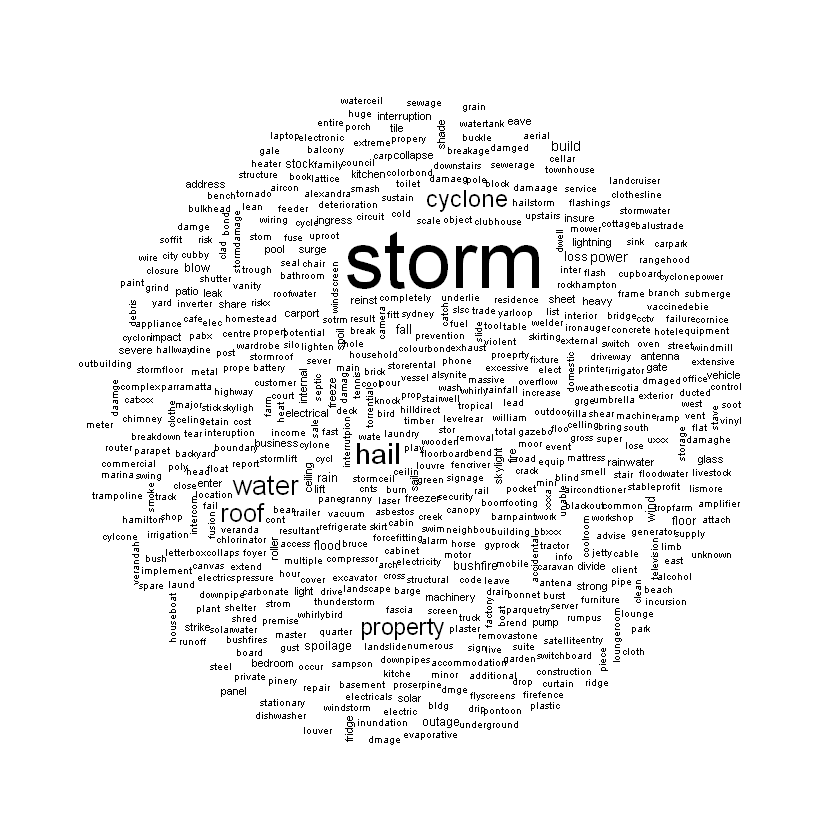

In [14]:
mat_CAT <- as.matrix(tdm_CAT)
WordFreq <- sort(rowSums(mat_CAT),decreasing=TRUE)
df_CAT <- data.frame(word = names(WordFreq),freq=WordFreq)

wordcloud(df_CAT$word,df_CAT$freq)

In [12]:
#removing sparse terms
dtm_CAT_non_sparse <-removeSparseTerms(dtm_CAT,0.999)

#selecting only the rows with at least one term present
dtm_CAT_non_sparse <- as.matrix(dtm_CAT_non_sparse[rowSums(as.matrix(dtm_CAT_non_sparse)) > 0,])

In [13]:
#create a combination of all models on CAT data
## setting parameters for CAT model
k_CAT<- length(unique(dataframe_CAT$CO_CAT))
SEED1=as.integer(Sys.time()) 
control_LDA_VEM_CAT <-list(estimate.alpha = TRUE, alpha = 50/k_CAT, estimate.beta = TRUE,verbose = 0, prefix = tempfile(), save = 0, keep = 0, seed = SEED1, nstart = 1, best = TRUE,var = list(iter.max = 500, tol = 10^-6),em = list(iter.max = 1000, tol = 10^-4),initialize = "random")

TM_CAT <-list(VEM_alpha_fixed_CAT= LDA(dtm_CAT_non_sparse, k_CAT, method = "VEM", control = control_LDA_VEM_CAT),VEM_CAT = LDA(dtm_CAT_non_sparse, k = k_CAT, method = "VEM", control = list(seed = SEED1)),VEM_fixed_CAT  = LDA(dtm_CAT_non_sparse, k = k_CAT, method = "VEM",control = list(estimate.alpha = FALSE, seed = SEED1)),Gibbs_CAT  = LDA(dtm_CAT_non_sparse, k = k_CAT, method = "Gibbs",control = list(seed = SEED1, burnin = 1000,thin = 100, iter = 1000)),CTM_CAT = CTM(dtm_CAT_non_sparse, k = k_CAT,control = list(seed = SEED1,var = list(tol = 10^-4), em = list(tol = 10^-3))))


In [14]:
#creating dataframe of keywords obtained from each model
##VEM alpha value fixed (estimate alpha: TRUE)
df_VEM_alpha_fixed_CAT<- data.frame(unlist(as.data.frame(terms(TM_CAT[["VEM_alpha_fixed_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_alpha_fixed_CAT)[1] <- "KEYWORDS"
##VEM default
df_VEM_CAT<- data.frame(unlist(as.data.frame(terms(TM_CAT[["VEM_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_CAT)[1] <- "KEYWORDS"
##VEM fixed (estimate alpha: FALSE)
df_VEM_fixed_CAT<- data.frame(unlist(as.data.frame(terms(TM_CAT[["VEM_fixed_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_fixed_CAT)[1] <- "KEYWORDS"
##Gibbs
df_Gibbs_CAT<- data.frame(unlist(as.data.frame(terms(TM_CAT[["Gibbs_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_Gibbs_CAT)[1] <- "KEYWORDS"
##CTM
df_CTM_CAT<- data.frame(unlist(as.data.frame(terms(TM_CAT[["CTM_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_CTM_CAT)[1] <- "KEYWORDS"

#creating 1 final dataframe with all keywords obtained from the above models
df_all_CAT_key_words<- rbind(df_VEM_alpha_fixed_CAT,df_VEM_CAT,df_VEM_fixed_CAT,df_Gibbs_CAT,df_CTM_CAT )   

In [15]:
# get number of occurrences of a word across models/ topics
count_keyword_occ_CAT<-df_all_CAT_key_words %>% 
    count(KEYWORDS)

##renaming column to 'KEYWORDS'
colnames(count_keyword_occ_CAT)[2] <- "COUNT"

count_keyword_occ_CAT<-count_keyword_occ_CAT[order(-count_keyword_occ_CAT$COUNT),] 

In [16]:
#getting weightages on the basis of tf idf values
##get a dataframe of IDs vs description
DataText_CAT <- data.frame(doc_id = dataframe_CAT$R_UNIQUEID, text = dataframe_CAT$R_CLM_DESC_TREATED)
tfidf_corpus_CAT <- VCorpus(DataframeSource(DataText_CAT))

##Creating a document term matrix weighted by TfIdf 
CAT_dtm_tfidf <- DocumentTermMatrix(tfidf_corpus_CAT, 
                               control=list(
                                 wordLengths=c(3, 50),
                                 weighting = function(x)
                                   weightTfIdf(x,normalize = F)))
                                     
## Removing the sparse terms, coverting to a data frame and eyeballing the significant words
CAT_dtm_nonsparse_tfidf <- removeSparseTerms(CAT_dtm_tfidf,0.999)
CAT_dtm_nonsparse_tfidf <- as.matrix(CAT_dtm_nonsparse_tfidf)

# Summing the column values to see if the expected keywords have high weightages across docs
WordWeightsSum_CAT <- apply(CAT_dtm_nonsparse_tfidf, 2, sum)
WordWeightsSum_CAT <- cbind(WordWeightsSum_CAT, colnames(CAT_dtm_nonsparse_tfidf))
WordWeightsSum_CAT <- as.data.frame(WordWeightsSum_CAT)
WordWeightsSum_CAT$WordWeightsSum_CAT <- as.numeric(as.character(WordWeightsSum_CAT$WordWeightsSum_CAT))
WordWeightsSum_CAT <- WordWeightsSum_CAT[order(-WordWeightsSum_CAT$WordWeightsSum_CAT),]

##renaming column to 'KEYWORDS'
colnames(WordWeightsSum_CAT)[1] <- "WordWeightsSum_CAT"
colnames(WordWeightsSum_CAT)[2] <- "KEYWORDS"
WordWeightsSum_CAT[1:3,]

,WordWeightsSum_CAT,KEYWORDS
storm,7011.537,storm
hail,5239.394,hail
water,5054.237,water


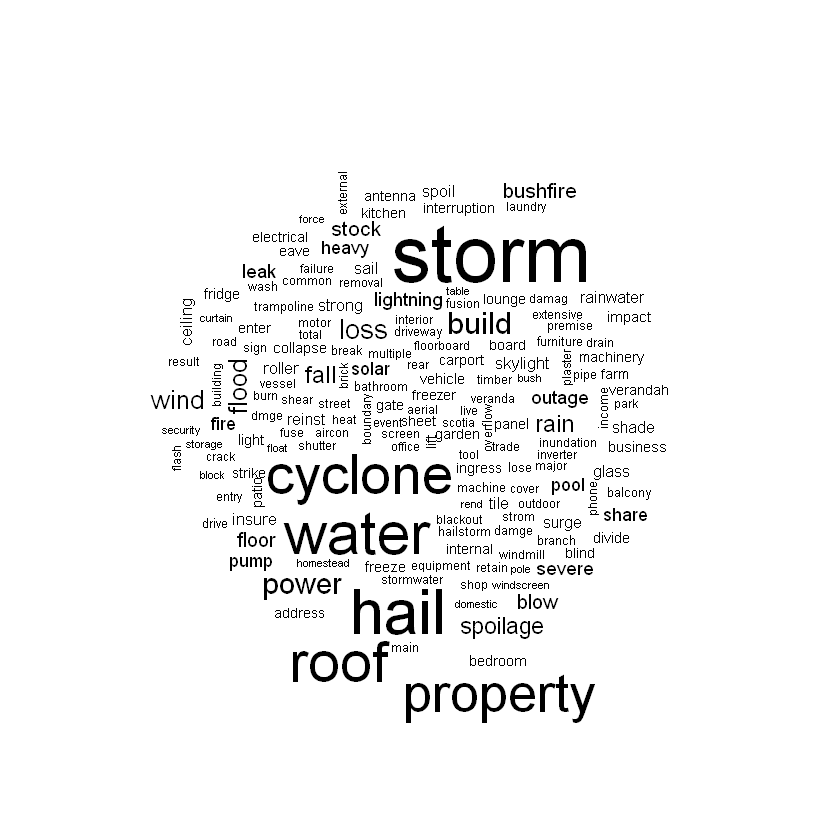

In [17]:
#Cloud with tf-idf weights rather than TFs
wordcloud(WordWeightsSum_CAT$KEYWORDS,WordWeightsSum_CAT$WordWeightsSum_CAT)

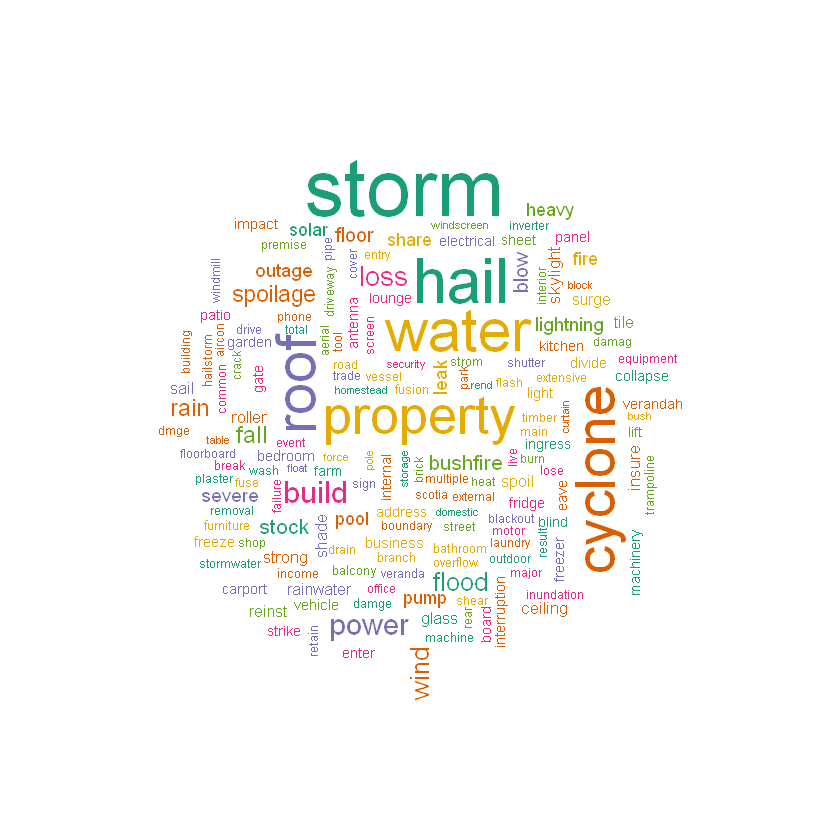

In [31]:
#Cloud with TF-IDF weights with right sizing and minimum freq value
wordcloud(WordWeightsSum_CAT$KEYWORDS, WordWeightsSum_CAT$WordWeightsSum_CAT, scale=c(4,.5), min.freq=3, max.words=Inf,
random.order=TRUE, random.color=TRUE, rot.per=.2, colors=brewer.pal(6, "Dark2"))

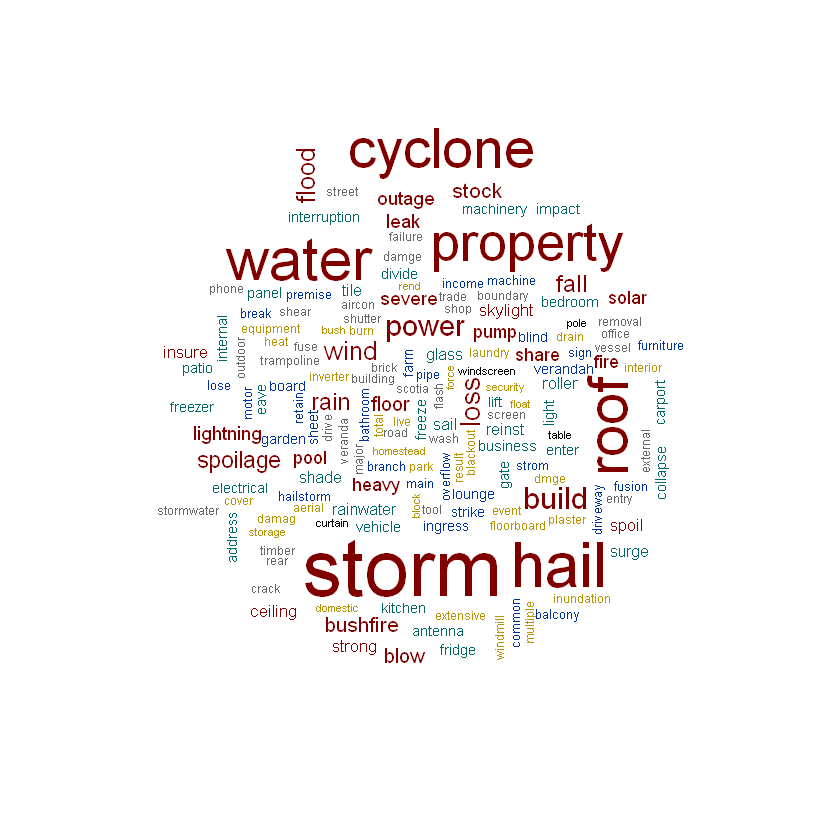

In [47]:
#Ordering the colors and giving them the MuSigma palatte
WordWeightsSum_CAT <- within(WordWeightsSum_CAT, colors <- as.integer(cut(as.numeric(WordWeightsSum_CAT), 
                                                unique(quantile(as.numeric(WordWeightsSum_CAT), probs=0:5/5),
                                                       include.lowest=TRUE))))
maroon <- rgb(128,0,0, maxColorValue = 255)
teal <- rgb(0,102,102,maxColorValue = 255)
LightTeal <- rgb(203,211,211,maxColorValue = 255)
tan <- rgb(226,225,192,maxColorValue = 255)
ash <- rgb(102,102,102,maxColorValue = 255)
DarkYellow <- rgb(182,148,4,maxColorValue = 255)
blue <- rgb(0,51,153,maxColorValue = 255)
WordWeightsSum_CAT$colors[WordWeightsSum_CAT$colors == 5] <- maroon
WordWeightsSum_CAT$colors[WordWeightsSum_CAT$colors == 4] <- teal
WordWeightsSum_CAT$colors[WordWeightsSum_CAT$colors == 3] <- blue
WordWeightsSum_CAT$colors[WordWeightsSum_CAT$colors == 2] <- ash
WordWeightsSum_CAT$colors[WordWeightsSum_CAT$colors == 1] <- DarkYellow
 
wordcloud(WordWeightsSum_CAT$KEYWORDS, WordWeightsSum_CAT$WordWeightsSum_CAT, scale=c(4,.5), max.words=Inf,
random.order=TRUE, rot.per=.2, colors=WordWeightsSum_CAT$colors, ordered.colors = TRUE)

In [17]:
# merge TM outputs with word tfidf weightages
CAT_kw_count_weightages <- merge(x = count_keyword_occ_CAT, y = WordWeightsSum_CAT, by.x = "KEYWORDS",by.y = "KEYWORDS", all.x=TRUE)

#select final CAT event key terms
#condition: 0.8 percentile on #occurrences and 0.7 percentile on weightage
terms_list_df_CAT<-CAT_kw_count_weightages[CAT_kw_count_weightages$COUNT >= quantile(CAT_kw_count_weightages$COUNT, 0.8) & CAT_kw_count_weightages$WordWeightsSum_CAT >= quantile(CAT_kw_count_weightages$WordWeightsSum_CAT, 0.70),]

#create a vector out of these terms
derived_CAT_events_kw<-as.vector(terms_list_df_CAT$KEYWORDS)
#some mandatory terms
specified_CAT_events_kw<- c("olwyn","marcia","debbie","fire","yarloop","nora","kelvin","marcus","joyce")

#create a merged list of all CAT key terms
total_CAT_events_kw=unique(c(derived_CAT_events_kw,specified_CAT_events_kw))
total_CAT_events_kw

[1] "awning"    "blow"      "build"     "bushfire"  "ceiling"   "claim"    
 [7] "cyclone"   "debbie"    "fall"      "fire"      "flood"     "floor"    
[13] "fridge"    "garage"    "gutter"    "hail"      "house"     "leak"     
[19] "loss"      "power"     "rain"      "rainwater" "roller"    "roof"     
[25] "severe"    "share"     "skylight"  "spoilage"  "stock"     "storm"    
[31] "tank"      "tree"      "wall"      "water"     "wind"      "olwyn"    
[37] "marcia"    "debbie"    "fire"      "yarloop"   "nora"      "kelvin"   
[43] "marcus"    "joyce"

In [19]:
#creating base requirements for LDA: data set: CAT_FLAG=0
##create a corpus of the document
vdocs_non_CAT <- VCorpus(VectorSource(dataframe_non_CAT$R_CLM_DESC_TREATED))

##tdm: create the term document matrix
tdm_non_CAT <- TermDocumentMatrix(vdocs_non_CAT)

##dtm: document term matrix
dtm_non_CAT <-  DocumentTermMatrix(vdocs_non_CAT)

In [20]:
#removing sparse terms
dtm_non_CAT_non_sparse <-removeSparseTerms(dtm_non_CAT,0.999)

#selecting only the rows with at least one term present
dtm_non_CAT_non_sparse <- as.matrix(dtm_non_CAT_non_sparse[rowSums(as.matrix(dtm_non_CAT_non_sparse)) > 0,])

In [21]:
#create a combination of all models on CAT data
## setting parameters for CAT model
k_non_CAT<- length(unique(dataframe_non_CAT$CO_CAT))
SEED2=as.integer(Sys.time()) 
control_LDA_VEM_non_CAT <-list(estimate.alpha = TRUE, alpha = 50/k_non_CAT, estimate.beta = TRUE,verbose = 0, prefix = tempfile(), save = 0, keep = 0, seed = SEED2, nstart = 1, best = TRUE,var = list(iter.max = 500, tol = 10^-6),em = list(iter.max = 1000, tol = 10^-4),initialize = "random")


TM_non_CAT <-list(VEM_alpha_fixed_non_CAT= LDA(dtm_non_CAT_non_sparse, k_non_CAT, method = "VEM", control = control_LDA_VEM_non_CAT),VEM_non_CAT = LDA(dtm_non_CAT_non_sparse, k = k_non_CAT, control = list(seed = SEED2)),VEM_fixed_non_CAT  = LDA(dtm_non_CAT_non_sparse, k = k_non_CAT,control = list(estimate.alpha = FALSE, seed = SEED2)),Gibbs_non_CAT  = LDA(dtm_non_CAT_non_sparse, k = k_non_CAT, method = "Gibbs",control = list(seed = SEED2, burnin = 1000,thin = 100, iter = 1000)),CTM_non_CAT = CTM(dtm_non_CAT_non_sparse, k = k_non_CAT,control = list(seed = SEED2,var = list(tol = 10^-4), em = list(tol = 10^-3))))

In [22]:
#creating dataframe of keywords obtained from each model
##VEM alpha value fixed (estimate alpha: TRUE)
df_VEM_alpha_fixed_non_CAT<- data.frame(unlist(as.data.frame(terms(TM_non_CAT[["VEM_alpha_fixed_non_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_alpha_fixed_non_CAT)[1] <- "KEYWORDS"
##VEM default
df_VEM_non_CAT<- data.frame(unlist(as.data.frame(terms(TM_non_CAT[["VEM_non_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_non_CAT)[1] <- "KEYWORDS"
##VEM fixed (estimate alpha: FALSE)
df_VEM_fixed_non_CAT<- data.frame(unlist(as.data.frame(terms(TM_non_CAT[["VEM_fixed_non_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_VEM_fixed_non_CAT)[1] <- "KEYWORDS"
##Gibbs
df_Gibbs_non_CAT<- data.frame(unlist(as.data.frame(terms(TM_non_CAT[["Gibbs_non_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_Gibbs_non_CAT)[1] <- "KEYWORDS"
##CTM
df_CTM_non_CAT<- data.frame(unlist(as.data.frame(terms(TM_non_CAT[["CTM_non_CAT"]], 10))))
##renaming column to 'KEYWORDS'
colnames(df_CTM_non_CAT)[1] <- "KEYWORDS"

#creating 1 final dataframe with all keywords obtained from the above models
df_all_non_CAT_key_words<- rbind(df_VEM_alpha_fixed_non_CAT,df_VEM_non_CAT,df_VEM_fixed_non_CAT,df_Gibbs_non_CAT,df_CTM_non_CAT )   




In [23]:
# get number of occurrences of a word across models/ topics
count_keyword_occ_non_CAT<-df_all_non_CAT_key_words %>% 
    count(KEYWORDS)

##renaming column to 'KEYWORDS'
colnames(count_keyword_occ_non_CAT)[2] <- "COUNT"

count_keyword_occ_non_CAT<-count_keyword_occ_non_CAT[order(-count_keyword_occ_non_CAT$COUNT),] 

In [24]:
#getting weightages on the basis of tf idf values
##get a dataframe of IDs vs description
DataText_non_CAT <- data.frame(doc_id = dataframe_non_CAT$R_UNIQUEID, text = dataframe_non_CAT$R_CLM_DESC_TREATED)
tfidf_corpus_non_CAT <- VCorpus(DataframeSource(DataText_non_CAT))

##Creating a document term matrix weighted by TfIdf 
non_CAT_dtm_tfidf <- DocumentTermMatrix(tfidf_corpus_non_CAT, 
                               control=list(
                                 wordLengths=c(3, 50),
                                 weighting = function(x)
                                   weightTfIdf(x,normalize = F)))
                                     
## Removing the sparse terms, coverting to a data frame and eyeballing the significant words
non_CAT_dtm_nonsparse_tfidf <- removeSparseTerms(non_CAT_dtm_tfidf,0.999)
non_CAT_dtm_nonsparse_tfidf <- as.matrix(non_CAT_dtm_nonsparse_tfidf)

# Summing the column values to see if the expected keywords have high weightages across docs
WordWeightsSum_non_CAT <- apply(non_CAT_dtm_nonsparse_tfidf, 2, sum)
WordWeightsSum_non_CAT <- cbind(WordWeightsSum_non_CAT, colnames(non_CAT_dtm_nonsparse_tfidf))
WordWeightsSum_non_CAT <- as.data.frame(WordWeightsSum_non_CAT)
WordWeightsSum_non_CAT$WordWeightsSum_non_CAT <- as.numeric(as.character(WordWeightsSum_non_CAT$WordWeightsSum_non_CAT))
WordWeightsSum_non_CAT <- WordWeightsSum_non_CAT[order(-WordWeightsSum_non_CAT$WordWeightsSum_non_CAT),]

##renaming column to 'KEYWORDS'
colnames(WordWeightsSum_non_CAT)[1] <- "WordWeightsSum_non_CAT"
colnames(WordWeightsSum_non_CAT)[2] <- "KEYWORDS"
WordWeightsSum_non_CAT[1:3,]

,WordWeightsSum_non_CAT,KEYWORDS
windscreen,44362.67,windscreen
water,41597.37,water
reverse,33909.46,reverse


In [25]:
# merge TM outputs with word tfidf weightages
non_CAT_kw_count_weightages <- merge(x = count_keyword_occ_non_CAT, y = WordWeightsSum_non_CAT, by.x = "KEYWORDS",by.y = "KEYWORDS", all.x=TRUE)

#select final non CAT event key terms
#condition: 0.8 percentile on #occurrences and 0.7 percentile on weightage
terms_list_df_non_CAT<-non_CAT_kw_count_weightages[non_CAT_kw_count_weightages$COUNT >= quantile(non_CAT_kw_count_weightages$COUNT, 0.8) & non_CAT_kw_count_weightages$WordWeightsSum_non_CAT >= quantile(non_CAT_kw_count_weightages$WordWeightsSum_non_CAT, 0.70),]

#create a vector out of these terms
derived_non_CAT_events_kw<-as.vector(terms_list_df_non_CAT$KEYWORDS)
#some mandatory terms
specified_non_CAT_events_kw<- c("theft","breakin","stolen","accident","steal","break","thirdparty")

#create a merged list of all CAT key terms
total_non_CAT_events_kw=unique(c(derived_non_CAT_events_kw,specified_non_CAT_events_kw))
total_non_CAT_events_kw

[1] "break"      "claim"      "insure"     "rear"       "reverse"   
 [6] "storm"      "vehicle"    "water"      "windscreen" "theft"     
[11] "breakin"    "stolen"     "accident"   "steal"      "break"

In [26]:
#create a list of all CAT and non CAT events terms
##these will become the column names

##CAT key words
C_KW<-NULL
for (i in 1:length(total_CAT_events_kw))
    {
    kw_c_i=paste0("C_",total_CAT_events_kw[i])
    C_KW=c(C_KW,kw_c_i)
}

##non_CAT key words
NC_KW<-NULL
for (i in 1:length(total_non_CAT_events_kw))
    {
    kw_nc_i=paste0("NC_",total_non_CAT_events_kw[i])
    NC_KW=c(NC_KW,kw_nc_i)
}


In [27]:
dataframe[1:3,]

R_UNIQUEID,DATE_REPT,PAYMENT_TAX_PERC,RRN__CA,R_INCIDENT_DESC,LOSS_POSTCODE,SUB_CLASS,R_SETTLING_BR,CLAV_CA_START_DATE,TRAN_DATE,...,R_INCURRED,OTHER_PARTY,ACTIVITY_DATE,MOTOR_RECOVERY,R_CLM_DESC,CO_CAT,CAT_FLAG,R_CLM_DESC_PREPROCESSED,R_CLM_DESC_NO_STOPWORDS,R_CLM_DESC_TREATED
485638,42885,0,2000888,LOST HEARING AID,6401,HPC,98,42914,42886,...,719.0227,N,42915,NA,LOST HEARING AID,NA,0,lost hearing aid,lost hearing aid,lose hear
435664,42795,0,7287675,INSD HIT TP,4655,MPV,75,42833,42797,...,840.5834,Y,42833,N,INSD HIT TP,NA,0,insd hit tp,hit,
167717,42485,0,2030024,INSD HIT TP,3166,MPV,61,42641,42514,...,8803.7628,N,42642,N,INSD HIT TP,NA,0,insd hit tp,hit,


In [28]:
#creating a copy of the data obtained so far just for designing the logic
dataframe_copy=data.frame(dataframe)
dataframe_copy=dataframe_copy[,c("R_UNIQUEID","R_CLM_DESC","R_CLM_DESC_TREATED")]

In [29]:
all_kw<-c(total_CAT_events_kw,total_non_CAT_events_kw)

In [30]:
all_col_names<-c(C_KW,NC_KW)

In [31]:
for (i in 1:length(all_kw))
{
    kw_i <- all_kw[i]
  dataframe_copy[, ncol(dataframe_copy) + 1] <- ifelse(grepl(kw_i, dataframe_copy$R_CLM_DESC_TREATED),1,0)
  names(dataframe_copy)[ncol(dataframe_copy)] <- all_col_names[i]

}

In [32]:
dataframe_copy

R_UNIQUEID,R_CLM_DESC,R_CLM_DESC_TREATED,C_awning,C_blow,C_build,C_bushfire,C_ceiling,C_claim,C_cyclone,...,NC_storm,NC_vehicle,NC_water,NC_windscreen,NC_theft,NC_breakin,NC_stolen,NC_accident,NC_steal,NC_break
485638,LOST HEARING AID,lose hear,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435664,INSD HIT TP,,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167717,INSD HIT TP,,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168337,ACCIDENTAL DAMAGE TO PHONE,accidental phone,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98299,LOSS OF RENT/ACCIDENTAL DAMAGE,loss rend accidental,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
351939,WATER DAMAGE TO UNIT X FROM LE,water,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
326108,STORM DAMAGE TO ROOF AND CEILI,storm roof,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
150733,BROKEN WINDOWS,break,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
121143,DAMAGE TO TYRE/WHEEL DURING LOADING,tyre wheel load,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167834,DAMAGE TILES & X COVERED WITH FRIDGE FREEZER,tile cover fridge freezer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
if("mlr" %in% rownames(installed.packages()) == FALSE) {install.packages("mlr", dep=TRUE, repos = "http://cran.r-project.org")
  library(mlr)} else {library(mlr)}  # for Naive Bayes

if("wordcloud" %in% rownames(installed.packages()) == FALSE) {install.packages("wordcloud", dep=TRUE, repos = "http://cran.r-project.org")
  library(wordcloud)} else {library(wordcloud)}  # for word cloud

Warning message:
"package 'mlr' was built under R version 3.4.4"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.4.4"Installing package into 'C:/Users/srishti.saha/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\srishti.saha\AppData\Local\Temp\RtmpK28xMa\downloaded_packages


Warning message:
"package 'wordcloud' was built under R version 3.4.4"Loading required package: RColorBrewer


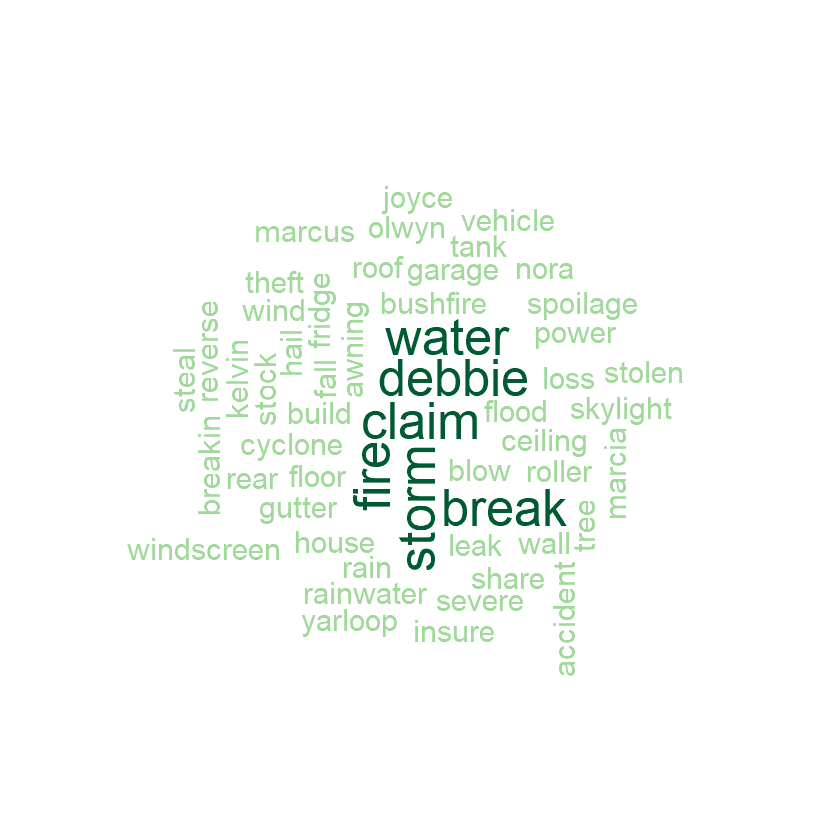

In [48]:
wordcloud(words =all_kw, min.freq = 1,scale=c(2.5,.5),
          max.words=100, random.order=FALSE, rot.per=0.3, 
          colors=brewer.pal(8, "Greens"))